# Breadth first search and Dijkstra's algorithm

## Vertice Class
- A Vertice is a node in a graph

In [1]:
class Vertice(object):
    def __init__(self, node):
        self.id = node
        self.adjacents = {}
        
    def __str__(self):
        return str(self.id + 1) + ' -> ' + str(self.adjacents)

## Graph Class
- A Graph is a set of vertice objects

In [2]:
class Graph(object):
    def __init__(self):
        self.vertices = []
        self.grid_data = []
        self.grid_dimension = 0

    # reads file data to grid
    def read_grid(self, filename):
        with open(filename) as file:
            next(file)
            self.grid_data = [i.split() for i in file.readlines()]
        self.grid_dimension = len(self.grid_data)

    # builds Graph, setting adjacence lists and weigths for each edge
    def build_graph(self):
        for index in range(0, self.grid_dimension):
            vertice = Vertice(index)
            self.vertices.append(vertice)
            
        for y, line in enumerate(self.grid_data):
            for x, value in enumerate(line):
                weight = float(value)
                if weight != 0:
                    self.vertices[x].adjacents[y] = weight
   
    # Prints graph as a list of vertices and its adjacence lists
    def print_adj_list(self):
        for vertice in self.vertices:
            print(vertice)


## Import input grid
Imports from raw .in file organized:

first line -> square matrix dimension value

other lines -> matrix with weight value lines separated by space

In [3]:
my_graph = Graph()
my_graph.read_grid('./input/g1.in')
my_graph.grid_data

[['0.0', '0.8', '0.0', '0.0', '0.0', '0.0'],
 ['0.8', '0.0', '0.1', '0.3', '0.0', '0.0'],
 ['0.0', '0.1', '0.0', '0.0', '0.7', '0.0'],
 ['0.0', '0.3', '0.0', '0.0', '0.0', '0.25'],
 ['0.0', '0.0', '0.7', '0.0', '0.0', '0.4'],
 ['0.0', '0.0', '0.0', '0.25', '0.4', '0.0']]

## Graph representation

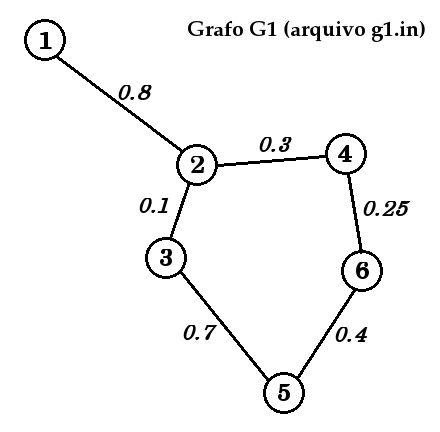

In [4]:
from IPython.display import Image
Image(filename='./assets/g1.png')

## Build Graph
With vertices and their adjacence lists

In [5]:
my_graph.build_graph()
my_graph.print_adj_list()

1 -> {1: 0.8}
2 -> {0: 0.8, 2: 0.1, 3: 0.3}
3 -> {1: 0.1, 4: 0.7}
4 -> {1: 0.3, 5: 0.25}
5 -> {2: 0.7, 5: 0.4}
6 -> {3: 0.25, 4: 0.4}


## Breadth First Search

In [6]:
def breadth_first_search(graph, start):
    visited = []
    queue = []
    queue.append(start)
    print('q:', queue, '/ v:', visited)
    while len(queue) > 0:
        vertice = queue.pop(0)
        if vertice not in visited:
            print('visits:', vertice)
            visited.append(vertice)
            queue.extend(graph.vertices[vertice].adjacents.keys())
            print('q:', queue, '/ v:', visited)
    print(queue, visited)
    return visited

path = breadth_first_search(my_graph, 0)
path

q: [0] / v: []
visits: 0
q: [1] / v: [0]
visits: 1
q: [0, 2, 3] / v: [0, 1]
visits: 2
q: [3, 1, 4] / v: [0, 1, 2]
visits: 3
q: [1, 4, 1, 5] / v: [0, 1, 2, 3]
visits: 4
q: [1, 5, 2, 5] / v: [0, 1, 2, 3, 4]
visits: 5
q: [2, 5, 3, 4] / v: [0, 1, 2, 3, 4, 5]
[] [0, 1, 2, 3, 4, 5]


[0, 1, 2, 3, 4, 5]

Two lists were printed, the queue q (adjacents to current node and previous node in queue) and the already visited nodes v.
The path chossen by breadth-first-search algorithm was [0, 1, 2, 3, 4, 5]

## Dijkstra's algorithm

In [7]:
def dijkstra(graph, start):
    visited = []
    queue = []
    dist = []
    
    adjacents = graph.vertices[start].adjacents
    minimal = min(adjacents, key=adjacents.get)
    value = adjacents[minimal]
    print(minimal, value)
    
    adjacents = graph.vertices[minimal].adjacents
    minimal = min(adjacents, key=adjacents.get)
    value = value + adjacents[minimal]
    print(minimal, value)
    
    adjacents = graph.vertices[minimal].adjacents
    minimal = min(adjacents, key=adjacents.get)
    value = value + adjacents[minimal]
    print(minimal, value)
    
#     queue.append(start)
#     adjacents = graph.vertices[start].adjacents
#     minimal = min(adjacents, key=adjacents.get)
#     queue.extend(adjacents)
#     print(minimal)
#     print('q:', queue, '/ v:', visited)
    
#     while len(queue) > 0:
        
#         vertice = minimal
#         if vertice not in visited:
#             print('visits:', vertice)
#             visited.append(vertice)
#             queue.extend(graph.vertices[vertice].adjacents.keys())
#             print('q:', queue, '/ v:', visited)
#     print(queue, visited)
#     return visited
dijkstra(my_graph, 0)
# path2 = dijkstra(my_graph, 0)
# path2

1 0.8
2 0.9
1 1.0
